<a href="https://colab.research.google.com/github/jpscard/I2A2_AI_Industry_Desafios/blob/main/C%C3%B3pia_de_Classifica%C3%A7%C3%A3o_Iris_Datasetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Aplicação - Regressão Logistica e árvore de decisão com Iris data - I2A2*
### *Alunos:*
###         *- Fernando Gomes de Oliveira*
###         *- Fernando Veiga*
###         *- Jardel Wolkers*
###         *- João Paulo Cardoso*
###         *- José Carlos Ribeiro Silva*


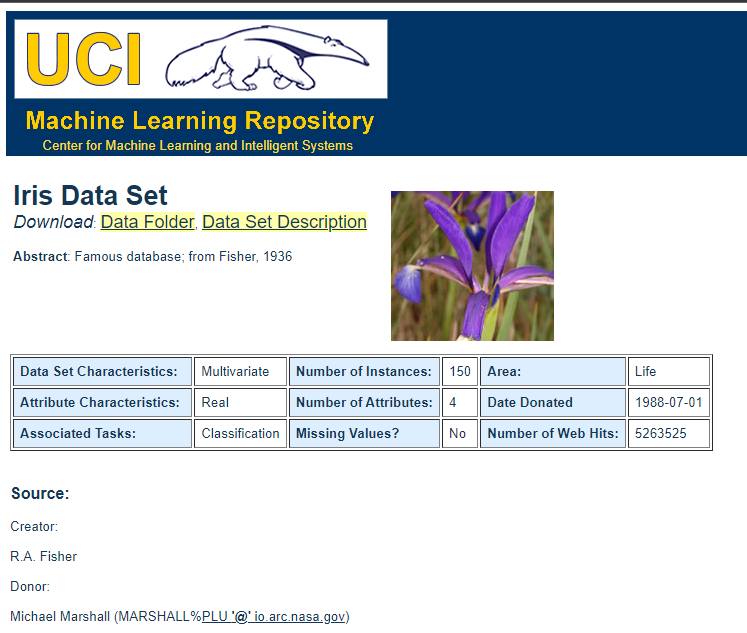

https://archive.ics.uci.edu/ml/datasets/iris

## **1 - Importando as bibliotecas**

In [1]:
import warnings
import os
from google.colab import drive
from google.colab import auth
from google.colab import files
import IPython
from IPython.display import Image
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 140
# Para dividir grupos de treino e teste
from sklearn.model_selection import train_test_split

# Importando os modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Impoprtando métricas para mensurar performance e comparação entre os modelos
from sklearn import metrics

# Configurar estilo seaborn para gráficos
sns.set_style('darkgrid')

## **2 - Importando e carregando o dataset**

### **2.1 Importando o dataset**

In [2]:
# Importanto o dataset Iris via biblioteca sklearn
from sklearn.datasets import load_iris

### **2.2 Carregar dataset**

In [3]:
# Carregar o dataset e converter para dataframe
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = pd.Series(iris['target'], name = 'target_values')
df['target_names'] = df['target'].replace([0,1,2],
['iris-' + species for species in iris['target_names'].tolist()])

## **3 -Análise exploratória de dados**

### **3.1 Exibindo informações iniciais**

In [4]:
# Para exibir as 5 primeiras linhas do dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa


In [5]:
# Para contar a quantidade de ocorrências de cada valor na coluna 'machine_status'
df['target_names'].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: target_names, dtype: int64

In [6]:
# Informação sobre o formato do dataframe
df.shape

(150, 6)

In [7]:
# Exibir um resumo das informações do dataframe, como número de linhas, colunas, tipos de dados, uso de memória, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Estatistica básica sem as classes target
df.iloc[:,:-2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Estatística descritiva agrupando os dados por espécie
df.groupby('target_names').describe().transpose()

target_names             iris-setosa  iris-versicolor  iris-virginica
sepal length (cm) count    50.000000        50.000000       50.000000
                  mean      5.006000         5.936000        6.588000
                  std       0.352490         0.516171        0.635880
                  min       4.300000         4.900000        4.900000
                  25%       4.800000         5.600000        6.225000
                  50%       5.000000         5.900000        6.500000
                  75%       5.200000         6.300000        6.900000
                  max       5.800000         7.000000        7.900000
sepal width (cm)  count    50.000000        50.000000       50.000000
                  mean      3.428000         2.770000        2.974000
                  std       0.379064         0.313798        0.322497
                  min       2.300000         2.000000        2.200000
                  25%       3.200000         2.525000        2.800000
                  50%       3.400000         2.800000        3.000000
                  75%       3.675000         3.000000        3.175000
                  max       4.400000         3.400000        3.800000
petal length (cm) count    50.000000        50.000000       50.000000
                  mean      1.462000         4.260000        5.552000
                  std       0.173664         0.469911        0.551895
                  min       1.000000         3.000000        4.500000
                  25%       1.400000         4.000000        5.100000
                  50%       1.500000         4.350000        5.550000
                  75%       1.575000         4.600000        5.875000
                  max       1.900000         5.100000        6.900000
petal width (cm)  count    50.000000        50.000000       50.000000
                  mean      0.246000         1.326000        2.026000
                  std       0.105386         0.197753        0.274650
                  min       0.100000         1.000000        1.400000
                  25%       0.200000         1.200000        1.800000
                  50%       0.200000         1.300000        2.000000
                  75%       0.300000         1.500000        2.300000
                  max       0.600000         1.800000        2.500000
target            count    50.000000        50.000000       50.000000
                  mean      0.000000         1.000000        2.000000
                  std       0.000000         0.000000        0.000000
                  min       0.000000         1.000000        2.000000
                  25%       0.000000         1.000000        2.000000
                  50%       0.000000         1.000000        2.000000
                  75%       0.000000         1.000000        2.000000
                  max       0.000000         1.000000        2.000000

### **3.2 Excluindo colunas com valores nulos ou NaN, além da inicial**

In [10]:
# Verificar se há valores NaN (not a number)
missing_count= df.isnull().sum() # Para contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": missing_count, "Percentual": missing_percentage})
print(missing_df)

                   Quantidade  Percentual
sepal length (cm)           0         0.0
sepal width (cm)            0         0.0
petal length (cm)           0         0.0
petal width (cm)            0         0.0
target                      0         0.0
target_names                0         0.0


## **4 - Visualização de dados**

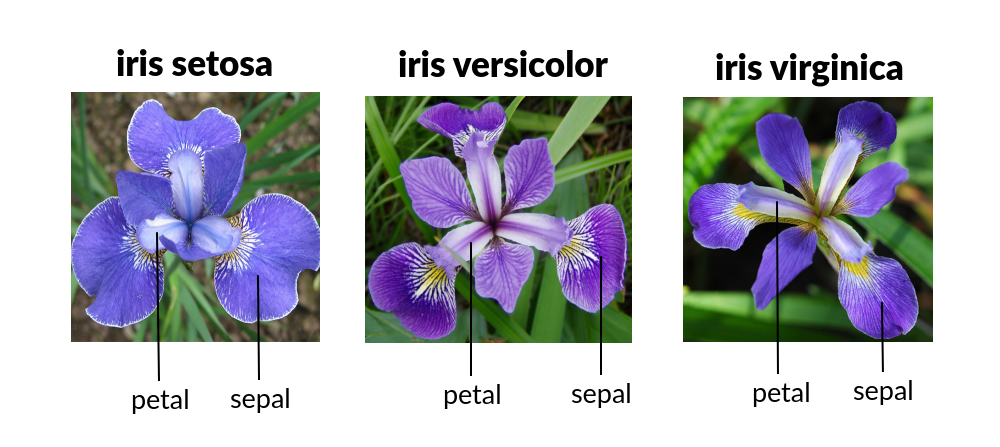

In [11]:
# Variação de medidas da espécie iris-setosa
setosa_min = pd.DataFrame(df[df.target_names =='iris-setosa'].min(), columns=['setosa(mín)'])[0:4]
setosa_max = pd.DataFrame(df[df.target_names =='iris-setosa'].max(), columns=['setosa(máx)'])[0:4]

# Variação das medidas da espécie iris-versicolor
versicolor_min = pd.DataFrame(df[df.target_names =='iris-versicolor'].min(), columns=['versicolor(mín)'])[0:4]
versicolor_max = pd.DataFrame(df[df.target_names =='iris-versicolor'].max(), columns=['versicolor(máx)'])[0:4]

# variação das medidas da espécie iris-virginica
virginica_min = pd.DataFrame(df[df.target_names =='iris-virginica'].min(), columns=['virginica(mín)'])[0:4]
virginica_max = pd.DataFrame(df[df.target_names =='iris-virginica'].max(), columns=['virginica(máx)'])[0:4]

pd.concat([setosa_min, setosa_max, versicolor_min,versicolor_max, virginica_min, virginica_max], axis=1)

,setosa(mín),setosa(máx),versicolor(mín),versicolor(máx),virginica(mín),virginica(máx)
sepal length (cm),4.3,5.8,4.9,7.0,4.9,7.9
sepal width (cm),2.3,4.4,2.0,3.4,2.2,3.8
petal length (cm),1.0,1.9,3.0,5.1,4.5,6.9
petal width (cm),0.1,0.6,1.0,1.8,1.4,2.5


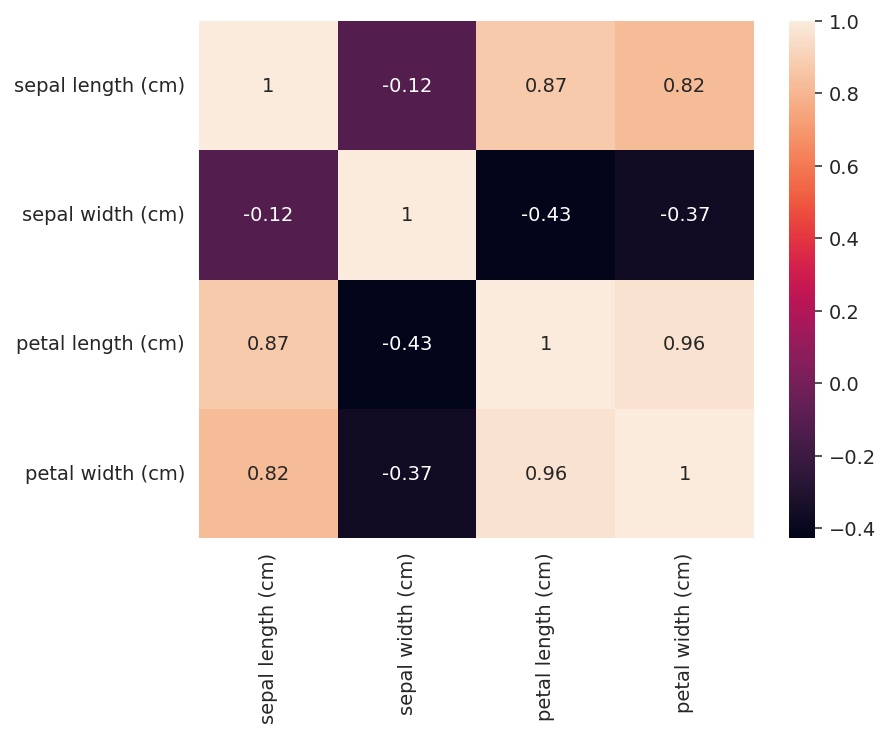

In [12]:
# Matrix de correlação 
sns.heatmap(df.iloc[:,:-2].corr(method='pearson'), annot = True);
plt.show()

A partir do gráfico acima, podemos ver que: 
- A largura da pétala e o comprimento da pétala têm altas correlações.
- O comprimento da pétala e a largura da sépala têm boas correlações.
- A largura da pétala e o comprimento da sépala têm boas correlações.

### **4.1 - Gráfico de dispersão**

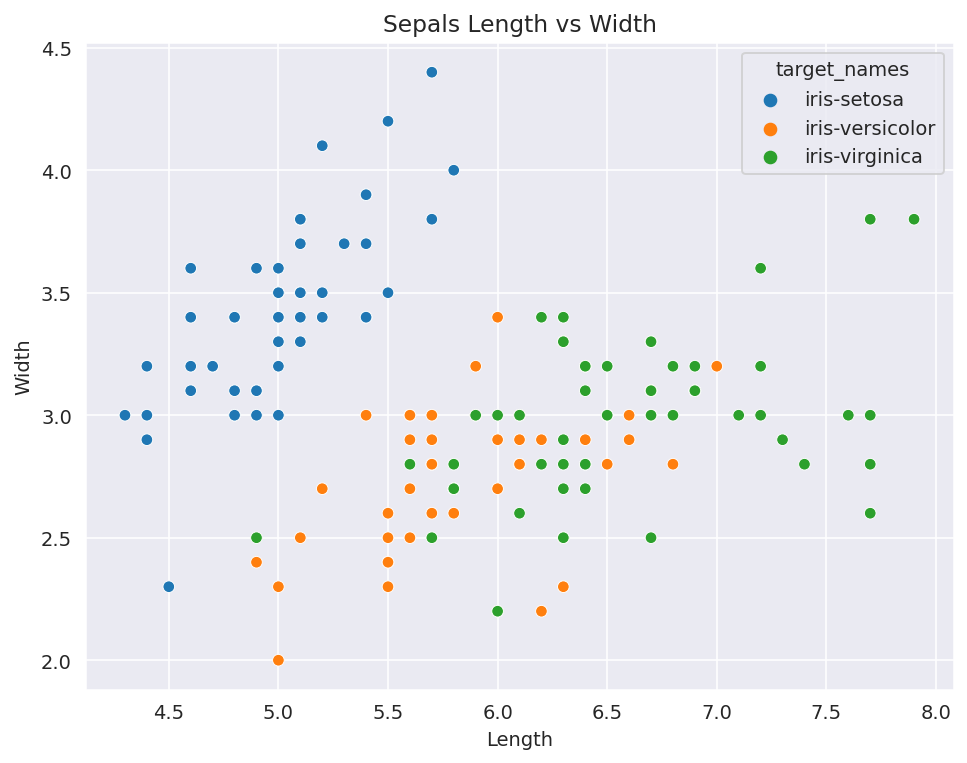

In [14]:
# Mostrar as relações das medidas de largura e comprimento de sépalas de cada espécie
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'target_names')
plt.title('Sepals Length vs Width')
plt.xlabel('Length')
plt.ylabel("Width")
plt.show()

A partir do gráfico acima, podemos inferir que: 

- A espécie Setosa tem comprimentos e larguras de pétalas menores. 

- A espécie Versicolor está no meio das outras duas espécies em termos de comprimento e largura da pétala 

- A espécie Virginica tem o maior comprimento e largura de pétalas.


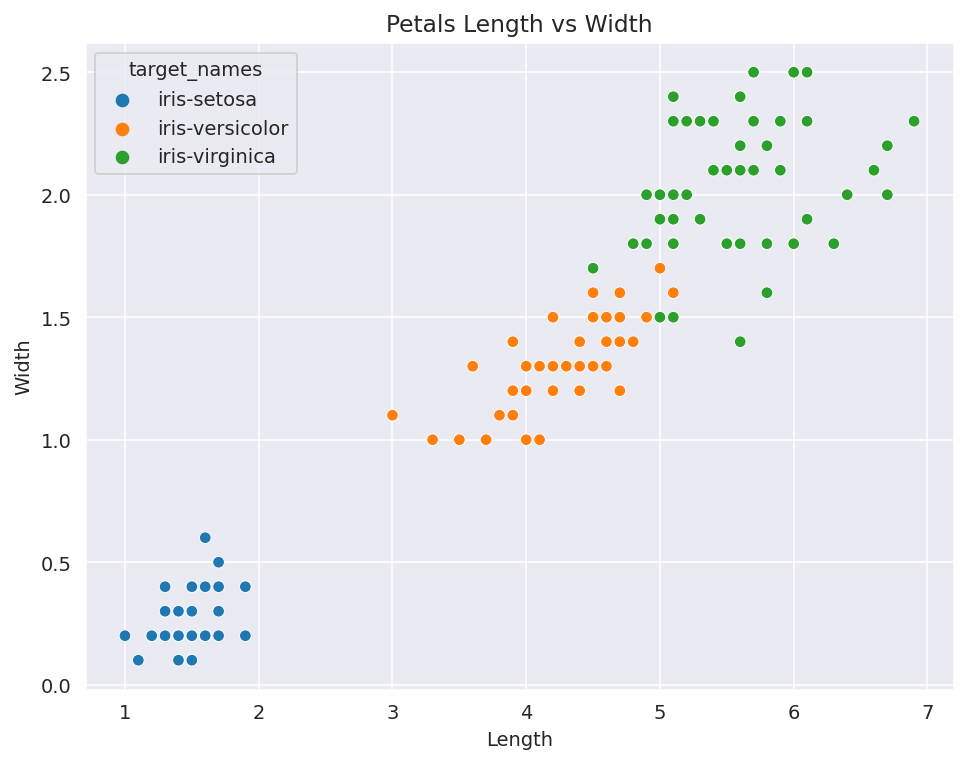

In [13]:
# Mostrar as relações das medidas de largura e comprimento de pétalas de cada espécie
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'target_names')
plt.title('Petals Length vs Width')
plt.xlabel('Length')
plt.ylabel("Width")
plt.show()

A partir do gráfico acima, podemos inferir que:

- A espécie Setosa tem comprimentos e larguras de pétalas menores.

- A espécie Versicolor está no meio das outras duas espécies em termos de comprimento e largura da pétala.

- A espécie Virginica tem o maior comprimento e largura de pétalas.


### **4.2 - Histogramas**

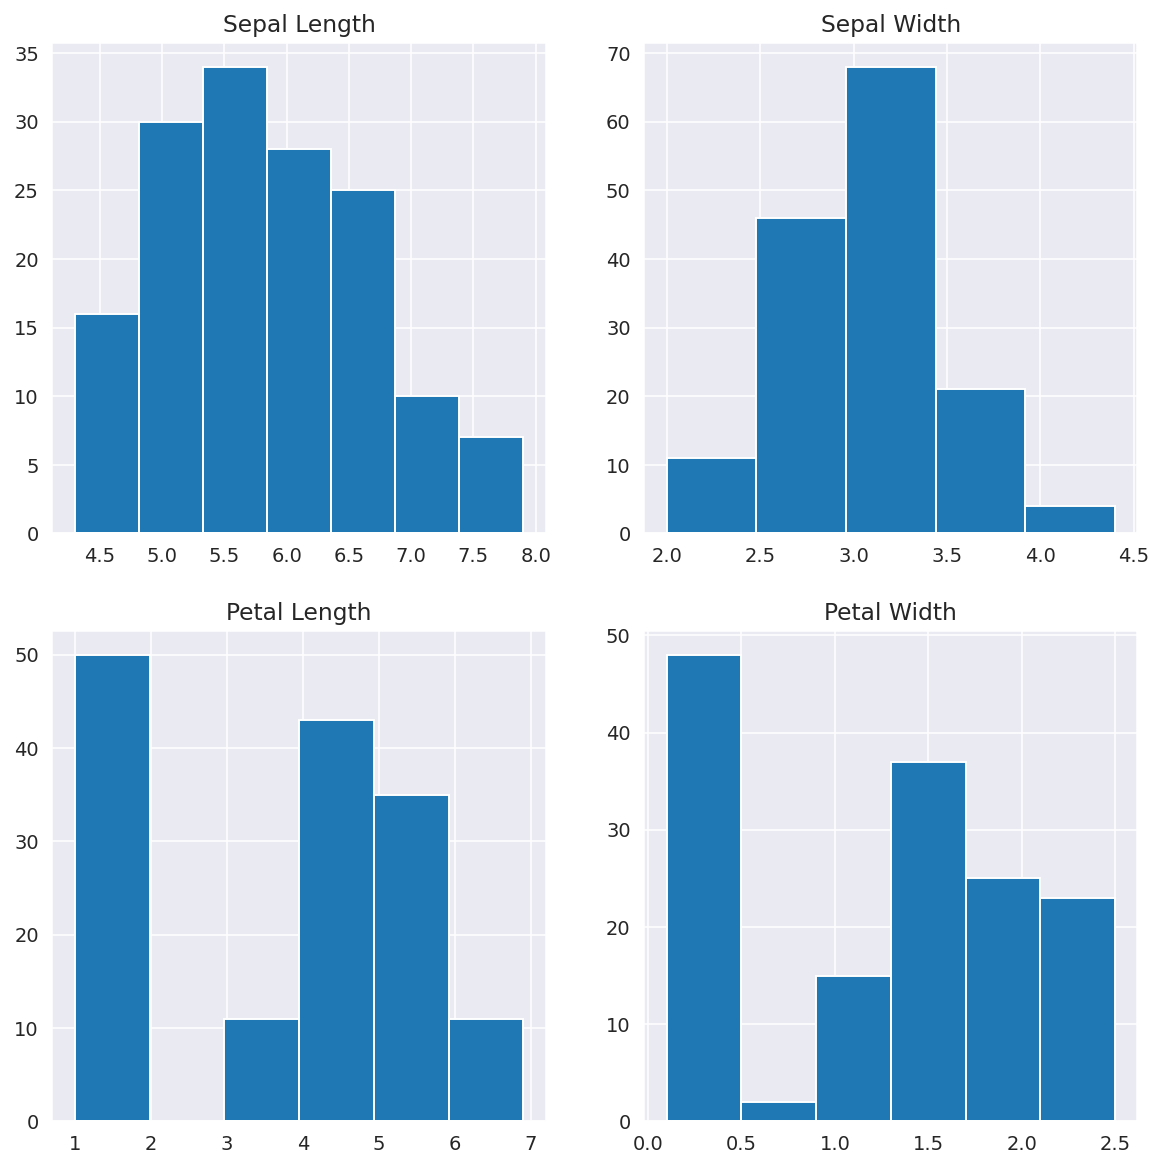

In [32]:
# histograma das classes
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal length (cm)'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal width (cm)'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal length (cm)'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal width (cm)'], bins=6);

A partir do gráfico acima, podemos ver que:

- A maior frequência do comprimento da sépala está entre 30 e 35, que está entre 5,5 e 6 

- A frequência mais alta da largura da sépala é em torno de 70, que está entre 3,0 e 3,5 

- A maior frequência do comprimento da pétala é em torno de 50, que está entre 1 e 2 

- A frequência mais alta da largura da pétala está entre 40 e 50, que está entre 0,0 e 0,5


### **4.3 - Gráfico de pares**

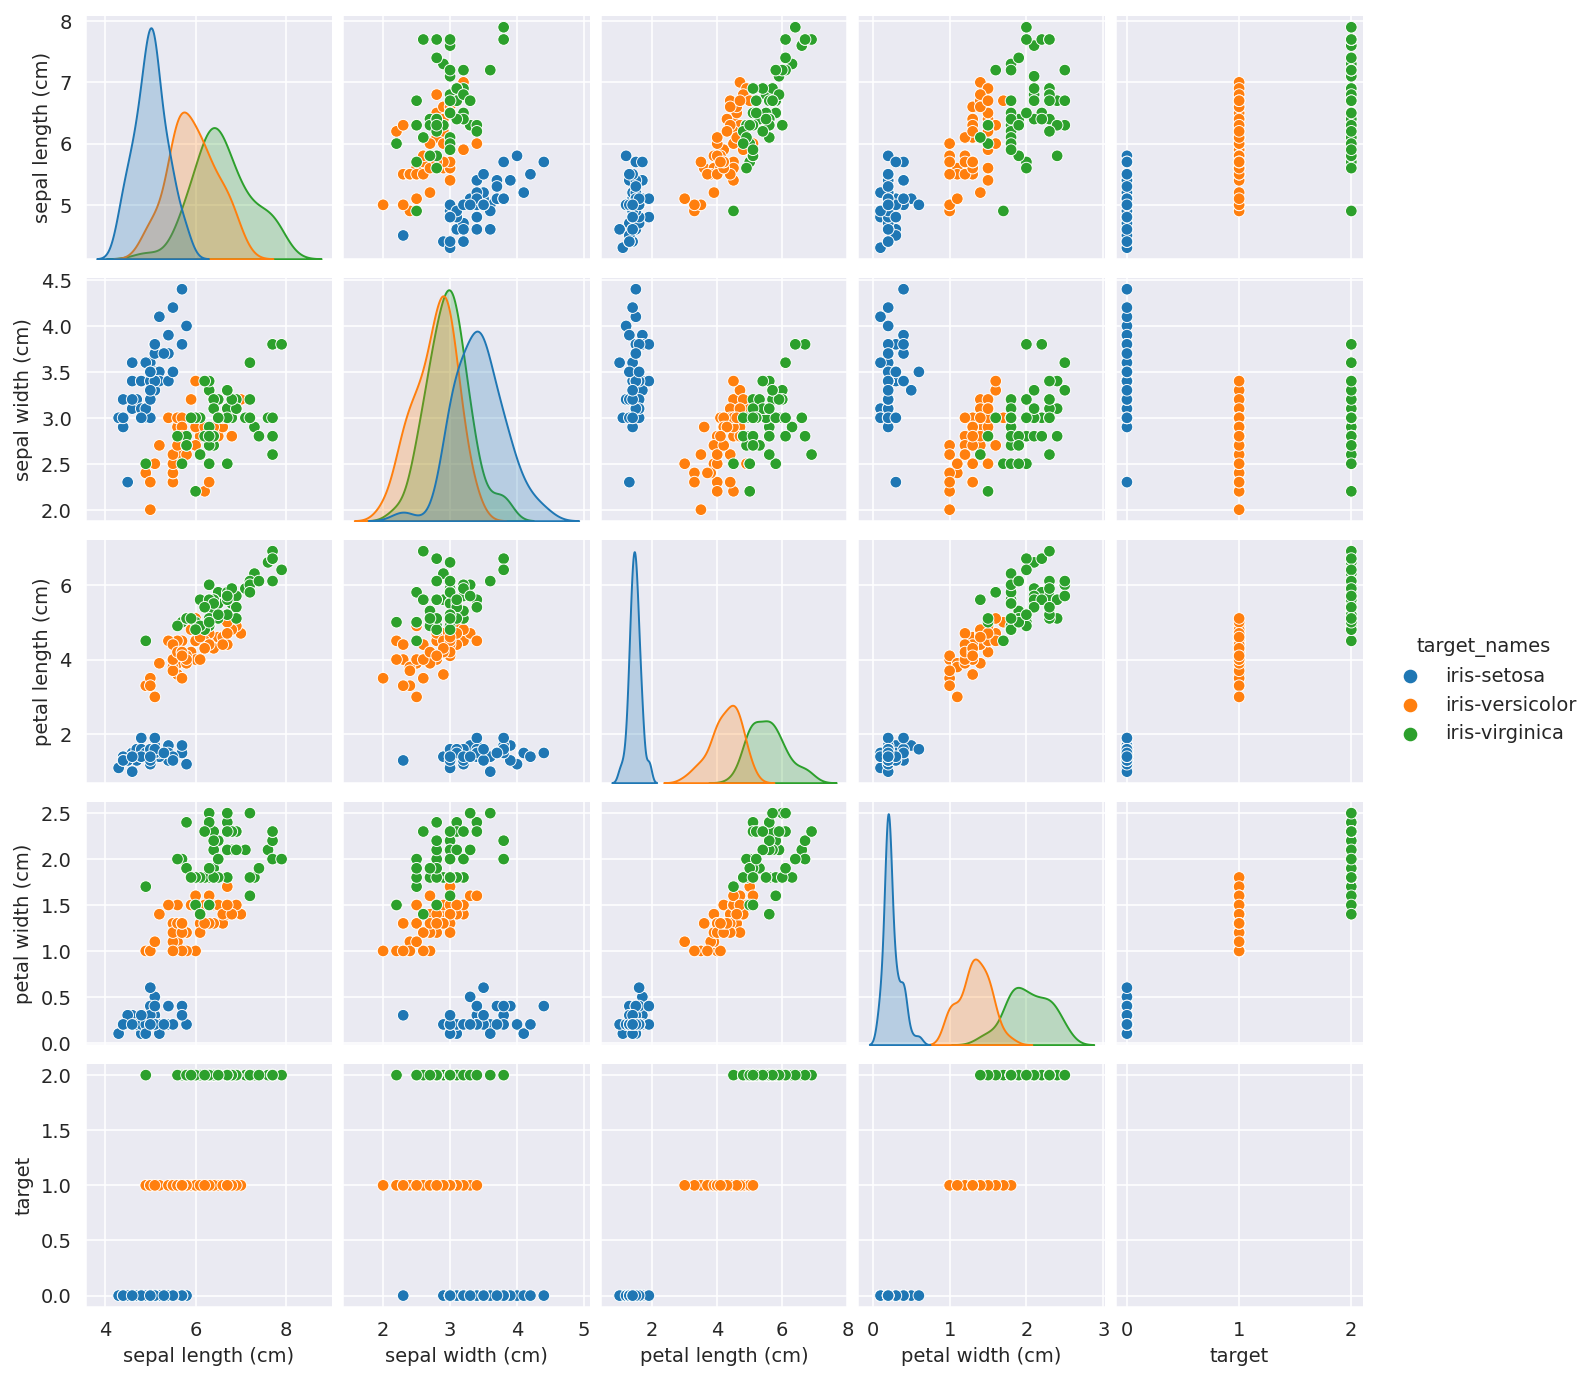

In [16]:
# Visualiza os dados fornecidos para encontrar a relação entre eles, onde as variáveis ​​podem ser contínuas ou categóricas
sns.pairplot(df, hue = 'target_names', height=2)

Podemos ver muitos tipos de relações neste gráfico, como, por exemplo, a espécie Setosa tem a menor largura e comprimento de pétalas. E também tem o menor comprimento de sépala, mas maiores larguras de sépala .

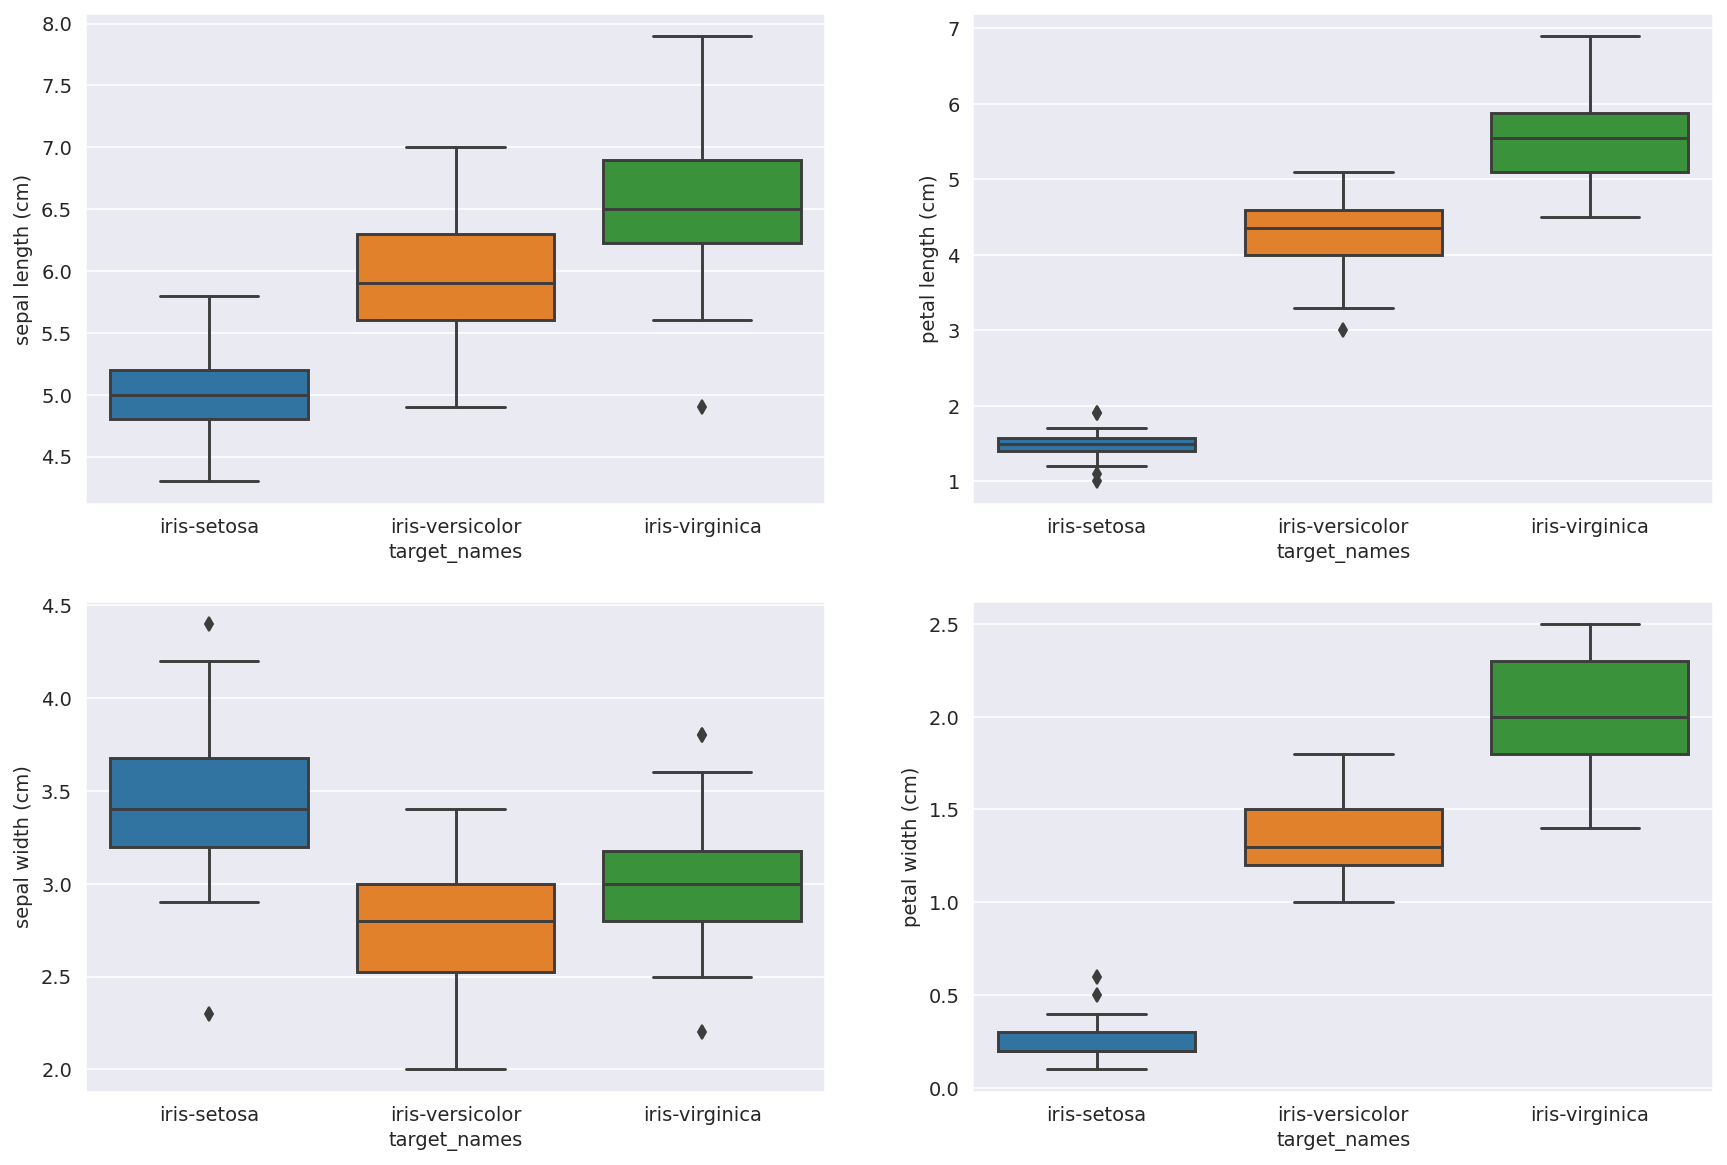

In [17]:
plt.rcParams["figure.figsize"] = (15,10)

fig, axes = plt.subplots(2, 2)
sns.boxplot(data=df, y='sepal length (cm)', x='target_names', ax=axes[0,0])
sns.boxplot(data=df, y='sepal width (cm)', x='target_names', ax=axes[1,0])
sns.boxplot(data=df, y='petal length (cm)', x='target_names', ax=axes[0,1])
sns.boxplot(data=df, y='petal width (cm)', x='target_names', ax=axes[1,1])
plt.show()

A partir do gráfico acima, podemos ver que:

- A espécie Setosa possui as menores feições e menos distribuídas com alguns outliers.

- A Espécie Versicolor tem as características médias. 

- A Espécie Virginica tem as características mais altas


### **4.4 - Gráfico de violino**

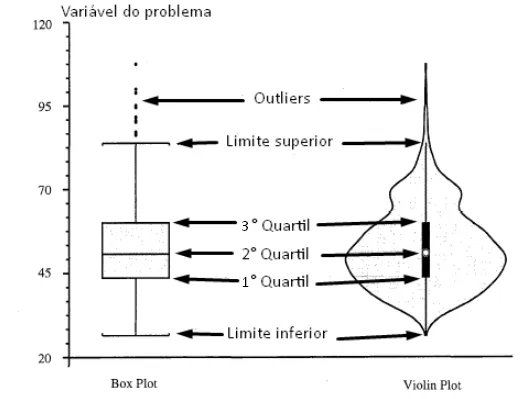

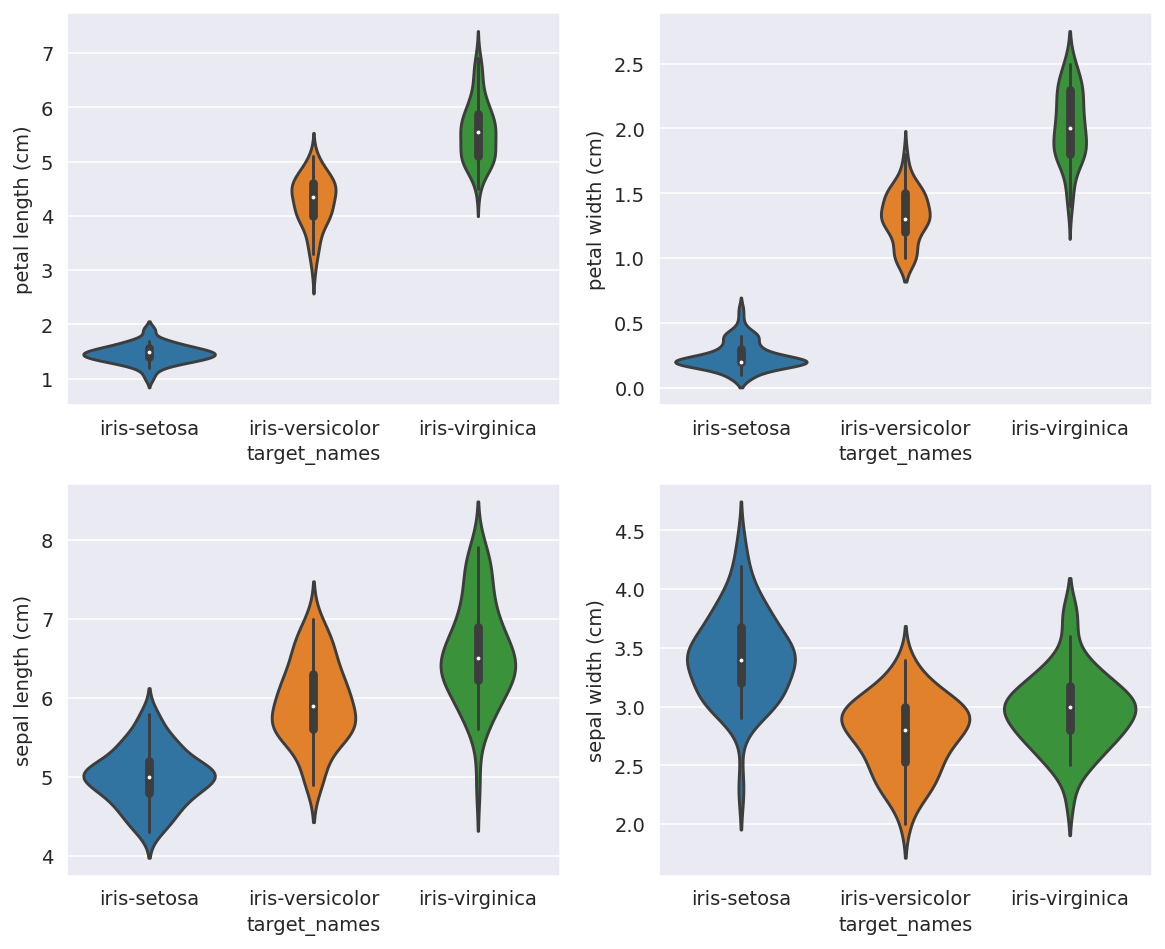

In [18]:
# Mostra a distribuição de dados quantitativos em vários níveis de uma (ou mais) variáveis ​​categóricas de modo que essas distribuições possam ser comparadas.
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='target_names', y='petal length (cm)', data = df)
plt.subplot(2,2,2)
sns.violinplot(x='target_names', y='petal width (cm)', data = df)
plt.subplot(2,2,3)
sns.violinplot(x='target_names', y='sepal length (cm)', data = df)
plt.subplot(2,2,4)
sns.violinplot(x='target_names', y='sepal width (cm)', data = df)
plt.show()

## **5 - Modelos Preditivos**

In [19]:
# separar as variáveis target e preditoras para fins de teste e treino.
predictors = df.iloc[:,:-2]
target = df['target']

# imprimir algumas linhas pré-determinadas
print('PREDICTORS')
print('----------')
print(predictors.iloc[[10,40,60,80,100,101]])
print('------------------------------------------------')
print('TARGET')
print('------')
print(target.iloc[[10,40,60,80,100,101]])

PREDICTORS
----------
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
10                 5.4               3.7                1.5               0.2
40                 5.0               3.5                1.3               0.3
60                 5.0               2.0                3.5               1.0
80                 5.5               2.4                3.8               1.1
100                6.3               3.3                6.0               2.5
101                5.8               2.7                5.1               1.9
------------------------------------------------
TARGET
------
10     0
40     0
60     1
80     1
100    2
101    2
Name: target, dtype: int64


In [20]:
# Divisão do dataset em dados de treino e de teste. 30% para teste e 70% para treino. Em seguida, o shape da divisão.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

print('Training Data - 70%: ', X_train.shape, y_train.shape)
print('Testing Data - 30%: ', X_test.shape, y_test.shape)

Training Data - 70%:  (105, 4) (105,)
Testing Data - 30%:  (45, 4) (45,)


### **5.1 Regressão Logística**

In [21]:
lr_model = LogisticRegression()
lr_fit = lr_model.fit(X_train, y_train)
lr_prediction = lr_fit.predict(X_test)

lr_metric = metrics.accuracy_score(lr_prediction, y_test)
print("Accuracy",lr_metric)

Accuracy 0.9777777777777777


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
pd.DataFrame(metrics.confusion_matrix(y_test,lr_prediction, labels=[0,1,2]),
             columns=['setosa_predicted','versicolor_predicted','virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,9,0,0
versicolor_original,0,15,0
virginica_original,0,1,20


### **5.2 - Árvore de Decisão**

In [23]:
dt_model = DecisionTreeClassifier()
dt_fit = dt_model.fit(X_train, y_train)
dt_prediction = dt_fit.predict(X_test)

dt_metric = metrics.accuracy_score(dt_prediction, y_test)
print("Accuracy", dt_metric)

Accuracy 0.9777777777777777


In [24]:
pd.DataFrame(metrics.confusion_matrix(y_test,dt_prediction, labels=[0,1,2]),
             columns=['setosa_predicted','versicolor_predicted','virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,9,0,0
versicolor_original,0,15,0
virginica_original,0,1,20


## **6 - Comparação da acurácia entre os modelos**

In [25]:
print('Logistic Regression:', round(lr_metric,3))
print('Decision Tree:', round(dt_metric,3))

Logistic Regression: 0.978
Decision Tree: 0.978


## **7 - Simples aplicação de predição**

### **7.1 - Regressão Logística**

In [33]:
print('Considere os valores de sépala e pétala e descubra a espécie:')
print('')
print('[0] iris-setosa, [1] iris-versicolor, [2] iris-virginica ')
print('')
while True:

    a = float(input("Insira o comprimento da sépala (cm): "))
    while a < 0:
        print("Valor inválido, insira valor maior que zero")
        a = float(input("Insira o comprimento da sépala (cm): "))
    print('')
    b = float(input("Insira a largura da sépala (cm): "))
    while b <= 0:
        print("Valor inválido, insira valor maior que zero")
        b = float(input("Insira a largura da sépala (cm): "))
    print('')
    c = float(input("Insira o comprimento da petala (cm): "))
    while c <= 0:
        print("Quantidade inválida, insira um valor maior que zero")
        c = float(input("Insira o comprimento da petala (cm): "))
    print('')
    d = float(input("Insira a largura da sépala (cm): "))
    while d <= 0:
        print("Valor inválido, insira um valor maior que zero")
        d = float(input("Insira a largura da sépala (cm): "))
    break
print('')
print("A especie predita é:",lr_model.predict([[a,b,c,d]]))
print('')

Considere os valores de sépala e pétala e descubra a espécie:

[0] iris-setosa, [1] iris-versicolor, [2] iris-virginica 



KeyboardInterrupt: ignored

### **7.2 - Arvore de decisão**

In [ ]:
print('Considere os valores de sépala e pétala e descubra a espécie:')
print('')
print('[0] iris-setosa, [1] iris-versicolor, [2] iris-virginica ')
print('')
while True:

    a = float(input("Insira o comprimento da sépala (cm): "))
    while a < 0:
        print("Valor inválido, insira valor maior que zero")
        a = float(input("Insira o comprimento da sépala (cm): "))
    print('')
    b = float(input("Insira a largura da sépala (cm): "))
    while b <= 0:
        print("Valor inválido, insira valor maior que zero")
        b = float(input("Insira a largura da sépala (cm): "))
    print('')
    c = float(input("Insira o comprimento da petala (cm): "))
    while c <= 0:
        print("Quantidade inválida, insira um valor maior que zero")
        c = float(input("Insira o comprimento da petala (cm): "))
    print('')
    d = float(input("Insira a largura da sépala (cm): "))
    while d <= 0:
        print("Valor inválido, insira um valor maior que zero")
        d = float(input("Insira a largura da sépala (cm): "))
    break
print('')
print("A especie predita é:",dt_model.predict([[a,b,c,d]]))
print('')

## **8 - Aplicação de predição WebApp**

In [ ]:
!pip install streamlit -q

In [ ]:
!npm install -g localtunnel

In [ ]:
%%writefile app.py
import streamlit as st
st.write('# Hello World')

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501
